In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [3]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

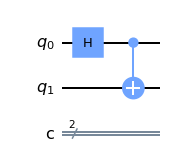

In [4]:
circ_phiplus = QuantumCircuit(2,2)
circ_phiplus.h(0)
circ_phiplus.cx(0,1)
circ_phiplus.draw('mpl')

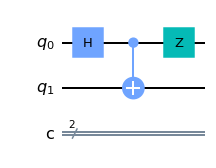

In [5]:
circ_phiminus = QuantumCircuit(2,2)
circ_phiminus.h(0)
circ_phiminus.cx(0,1)
circ_phiminus.z(0)
circ_phiminus.draw('mpl')

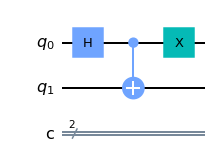

In [6]:
circ_psiplus = QuantumCircuit(2,2)
circ_psiplus.h(0)
circ_psiplus.cx(0,1)
circ_psiplus.x(0)
circ_psiplus.draw('mpl')

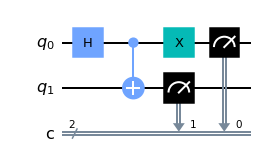

In [7]:
circ_psiplus.measure([0,1],[0,1])
circ_psiplus.draw('mpl')

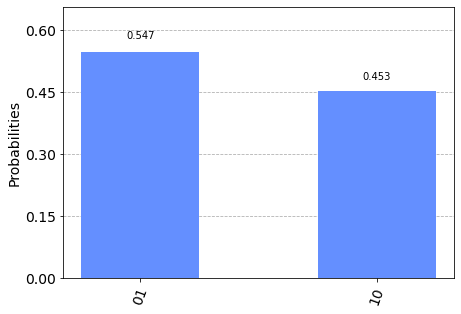

In [8]:
backend = Aer.get_backend('qasm_simulator')  # specifying that we will use qasm simulator
job = execute(circ_psiplus, backend, shots = 1024)  # shots=1024 specifies that the circuit will be run 1024 times
result = job.result()
# getting the counts, i.e., the fraction of times the circuit gave all the possible results
counts = result.get_counts(circ_psiplus)  
graph = plot_histogram(counts)
display(graph)

In [9]:
# Define a function that takes a QuantumCircuit (qc) and adds the common gates for all Bell states

def create_bell_pair(qc):
    qc.h(0)     # Apply a h-gate to the first qubit
    qc.cx(0,1)  # Apply a CNOT, using the first qubit as the control

In [10]:
# Define a function that takes the quantum circuit and the encoding for a specific Bell state as input,
# and adds the specific gates for that state
def specify_state(qc, msg):
    if msg == "00":
        pass             # To send '00' we do nothing (same as apply I-gate)
    elif msg == "01":
        qc.z(0)     # To send '01' we apply a Z-gate
    elif msg == "10":
        qc.x(0)      # To send '10' we apply an X-gate
    elif msg == "11":
        qc.x(0)      # To send '11' we apply a Z-gate
        qc.z(0)      # followed by an X-gate
    else:
        print("Invalid Message: Sending '00'")

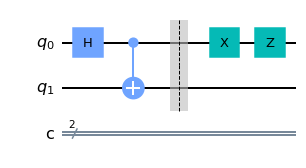

In [11]:
# Let's test out our functions!

qc_test = QuantumCircuit(2,2)

create_bell_pair(qc_test)  # First, creae the common parts of the circuit  - this is step 1: preparation

qc_test.barrier() # Adding a barrier between the 'common' part of the circuit and the part specific to the Bell state
#Note that barriers are just a visual aid to separate different parts of the circuit - they do not do anything else
#You can think of this barrier as step 2: travel

specify_state(qc_test,'11')  # We choose to create the psi+ state - this is step 3: encoding

qc_test.draw('mpl')

In [12]:
def bell_measure(qc):
    qc.cx(0,1)
    qc.h(0)
    qc.measure([0,1],[0,1])

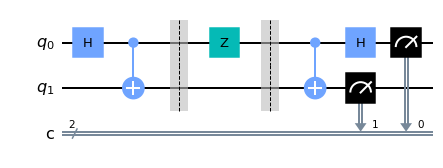

In [13]:
# Create the quantum circuit with 2 qubits
qc = QuantumCircuit(2,2)


# Step 1 : Preparation
create_bell_pair(qc)

qc.barrier() # This adds a barrier to our circuit. A barrier separates the gates in our diagram and makes it 
             # clear which part of the circuit is which. Think of this as step 2: travel. 
             # At this point, qubit 0 goes to Alice and qubit 1 goes to Bob


# Step 3: Encoding. Alice encodes her message onto qubit 0. In this case, we want to send the message '01'.
# You can try changing this value and see how it affects the circuit
message = "01"
specify_state(qc, message)


qc.barrier() # Another barrier. Think of this as step 4: Alice sends her qubit to Bob.


# Step 5: Decoding. After recieving qubit 0, Bob applies the decoding protocol.
bell_measure(qc) # Bob implements a Bell measurement to decode Alice's message

# Draw our output
qc.draw(output = "mpl")


{'01': 1024}


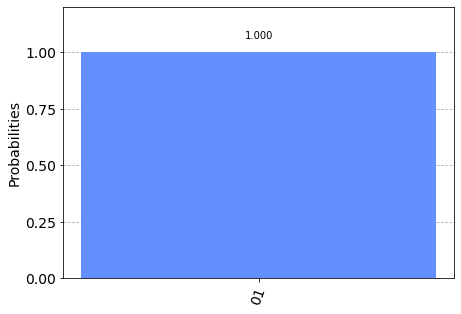

In [14]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()


measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)
